* # DATA SET SOBRE EL RIESGO CREDITICIO DE LOS CLIENTES
* # preguntas que podrías hacer a la empresa que te proporciona el conjunto de datos, algunas preguntas importantes podrían incluir:
    * ### la probabilidad de que un cliente sea un buen pagador o no
    * ### clasificar a los clientes en diferentes categorías de riesgo crediticio.
    * ### ¿Cómo se definió el "riesgo de crédito" y qué criterios se utilizaron para determinar la clasificación de los clientes?
    * ### ¿Hay alguna variable en el conjunto de datos que sea particularmente importante para la empresa y que deba ser incluida en el modelo predictivo?
-----------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#### #### INFORMACION GENERAL DEL DATA SET.
data = pd.read_csv("./cleintes_riesgo_de_credito.csv" ,sep=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

**Observación**
* Contiene 1000 filas y 21 columnas 
* Contiene valores flotante y muchos valores descriptivos(por lo visto tendremos que hacer bastante limpieza de datos)
* Estan todos los nombres de la columnas en ingles (Lo pasaremos en castellanos para que se entienda mucho mejor)
----
----

In [3]:
data = data.rename(columns={"checking_status":"estado_de_comprobacion" , "duration":"duracion_meses" ,
                            "credit_history":"historial_creditos","purpose":"proposito_credito",
                            "credit_amount":"cantidad_del_credito","savings_status":"estado_cuenta",
                            "employment":"empleo_en_años","installment_commitment":"compromiso_pago_a_plazos",
                            "personal_status":"sexo_estado","other_parties":"otros_garantes",
                            "residence_since":"reside_desde","property_magnitude":"magnitud_propiedad",
                            "age":"año_cliente","other_payment_plans":"otros_planes_pagos",
                            "housing":"vivienda","existing_credits":"creditos_existentes","job":"trabajo",
                            "num_dependents":"numero_de_dependientes","own_telephone":"telefono_propio",
                            "foreign_worker":"trabajador_extranjero","class":"clase"
                           })

In [4]:
data.columns.values

array(['estado_de_comprobacion', 'duracion_meses', 'historial_creditos',
       'proposito_credito', 'cantidad_del_credito', 'estado_cuenta',
       'empleo_en_años', 'compromiso_pago_a_plazos', 'sexo_estado',
       'otros_garantes', 'reside_desde', 'magnitud_propiedad',
       'año_cliente', 'otros_planes_pagos', 'vivienda',
       'creditos_existentes', 'trabajo', 'numero_de_dependientes',
       'telefono_propio', 'trabajador_extranjero', 'clase'], dtype=object)

In [5]:
data.describe()

,duracion_meses,cantidad_del_credito,compromiso_pago_a_plazos,reside_desde,año_cliente,creditos_existentes,numero_de_dependientes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


* ## Observación
    * ### Hacemos una descripción general de todos los datos numerico que tenga el data set.
    * ### Media de duracio en meses sobre el crédito = 21 
    * ### Media sobre la cantidad de crédito pedido = 3271 usd 
    * ### Media sobre el compromiso de pago a plazos = 3
        * #### Esta columna se refiere al porcentaje del ingreso disponible que un cliente compromete para pagar un préstamo en cuotas mensuales. Ejemplo: Cliente con ingreso de 1000 y dice aqui 3.0 (seria que esta comprometiendo el %30 de su sueldo = 300usd).
    * ### Media desde que tiempo se encuentran registrados dichos clientes = 2 años y 8 meses 
    * ### Media de edad sobre los clientes registrados = 35
    * ### Media de creditos existentes = 1.4
    * ### Media de numeros dependientes (numero propio) = 1.1
--------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
* # Graficamos los datos numericos que tenemos en el data set para que se pueda entender mejor de como se comportan los datos.

In [6]:
import seaborn as sns #LIBRERIA

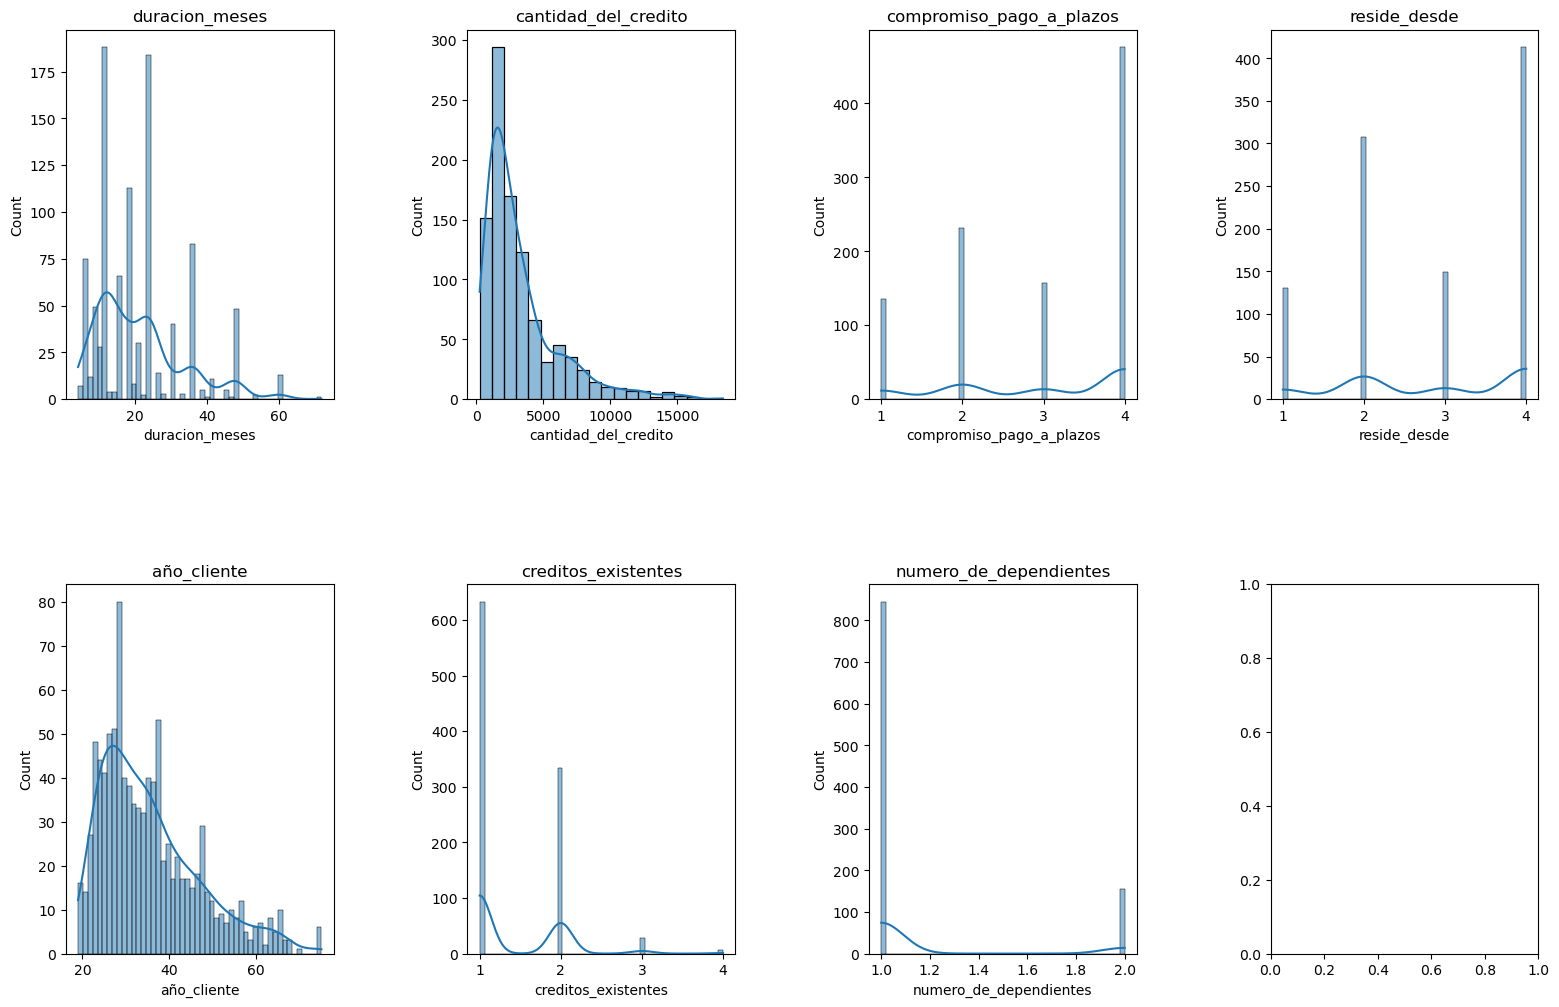

In [7]:
col_num = ["duracion_meses","cantidad_del_credito","compromiso_pago_a_plazos","reside_desde","año_cliente","creditos_existentes","numero_de_dependientes"]

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(19,12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, col in enumerate(col_num):
    if col == "cantidad_del_credito":
        nbins = 20
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i//4][i%4], bins=nbins, kde=True)
    ax[i//4][i%4].set_title(col)

----
------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
* # Ahora graficamos los datos categoricos y ver como se comportan.

In [8]:
#### #### seleccionamos las columnas categoricas
col_cat = ["estado_de_comprobacion","historial_creditos","proposito_credito","estado_cuenta","empleo_en_años","sexo_estado",
                "otros_garantes","magnitud_propiedad","otros_planes_pagos","vivienda","trabajo","telefono_propio",
                "trabajador_extranjero","clase"]

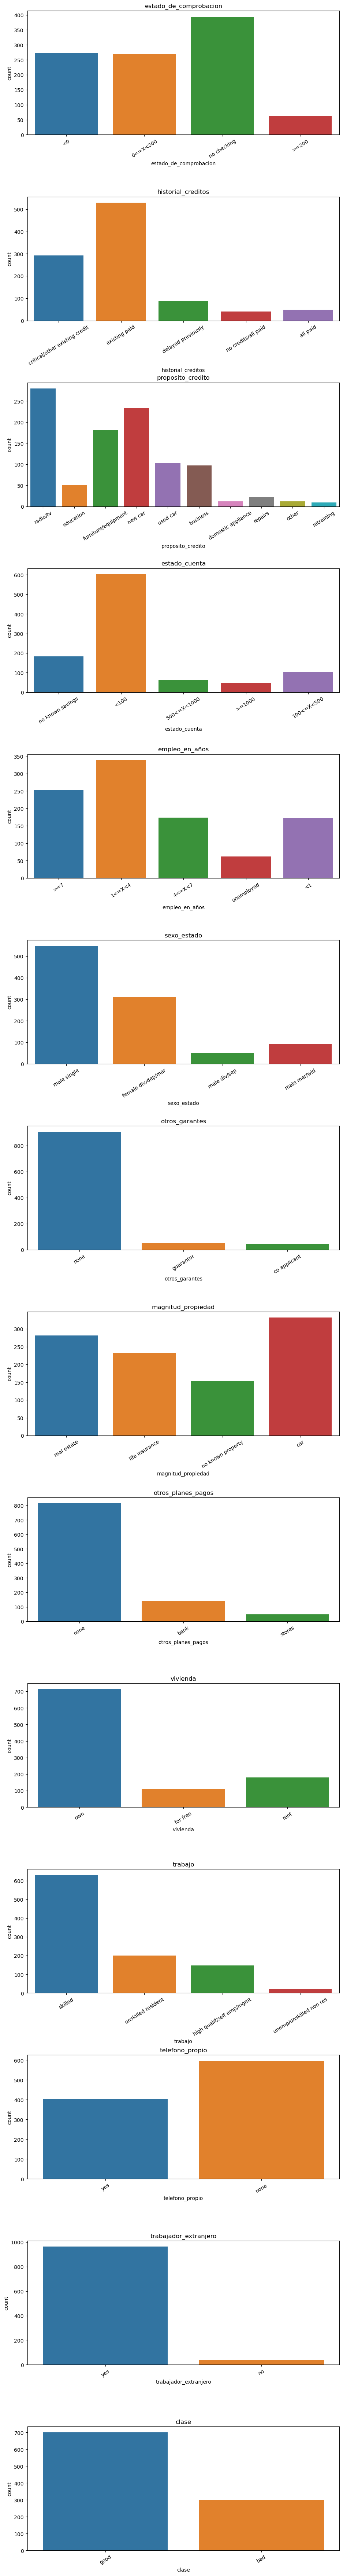

In [9]:
fig, ax = plt.subplots(nrows=len(col_cat) , ncols=1 , figsize=(11,90))
fig.subplots_adjust(hspace=0.5)

for i , col in enumerate(col_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=32)

 # Observación en cantidad sobre los datos categoricos de los clientes que presentamos en las graficas anteriores.
-----------
 
* ## Tenemos 4 estados de comprobacion:
    * #### No chequeados = 394 
    * #### <0 = 274
    * #### 0>=X<200 = 269 
    * #### >=200 = 63
* ## Tenemos 5 historiales de creditos:
    * #### Pago existente = 530
    * #### Crédito crítico/otro crédito existente = 293
    * #### Retrasados = 88 
    * #### todo pago = 49 
    * #### Sin créditos/todo pagado = 40
* ## Tenemos 9 en Propositos del credito:
    * #### Radio/Tv = 280
    * #### auto nuevo = 234
    * #### equipamiento de mobiliario = 181
    * #### auto usado = 103
    * #### negocio = 97 
    * #### educación = 50
    * #### reparaciones = 22
    * #### electrodoméstico & otros = 12
    * #### reentrenamiento = 9 
* ## El estado de cuenta tiene 5 tipos :
    * #### <100 = 603
    * #### no se conocen ahorros = 183
    * #### 100<=X<500 = 103
    * #### 500<=X<1000 = 63
    * #### >=1000 = 48 
* ## Empleo en años :
    * #### 1 a 4 años = 339
    * #### >= 7 años = 253 
    * #### 4 a <7 años = 174
    * #### menos de 1 año = 62 
* ## Sexo y estado civil :
    * #### hombre soltero = 548
    * #### mujer divorciada / separada / casada = 310 
    * #### hombre casado / viudo = 92
    * #### hombre divorciado / separado = 50
* ## Otros garantes :
    * #### nulo = 907
    * #### garante = 52
    * #### Cosolicitante = 41
* ## magnitud de la propiedad:
    * #### coche = 332
    * #### bien inmueble = 282
    * #### seguro de vida = 232
    * #### Sin propiedad conocida = 154
* ## Otros planes de pagos : 
    * #### N/A = 814
    * #### banco = 139
    * #### tienda = 47
* ## Vivienda :
    * #### poseedor = 713
    * #### alquila = 179 
    * #### vivienda gratis = 108
* ## Trabajo :
    * #### habil = 630 
    * #### residente no calificado = 200
    * #### alta calidad / autonomo / administracion = 148
    * #### desempleado / no calificado = 22
* ## Telefono propio : 
    * #### NO = 596
    * #### SI = 404
* ## Trabajador extranjero :
    * #### SI = 963
    * #### NO = 37
* ## clase :
    * #### Buena = 700
    * #### mala = 300
--------
--------

In [10]:
### ### Esta fue la manera que fui cambiando el nombre de la columna para ir viendo el resultado de cada uno y poder escribirlo
frecuencia = pd.Series(data["clase"]).value_counts()
frecuencia

good    700
bad     300
Name: clase, dtype: int64

------
* # Miremos primero su correlación antes de empezar a hacer cualquier tipo de predicciones.

C:\Users\Acer\AppData\Local\Temp\ipykernel_9476\949936012.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


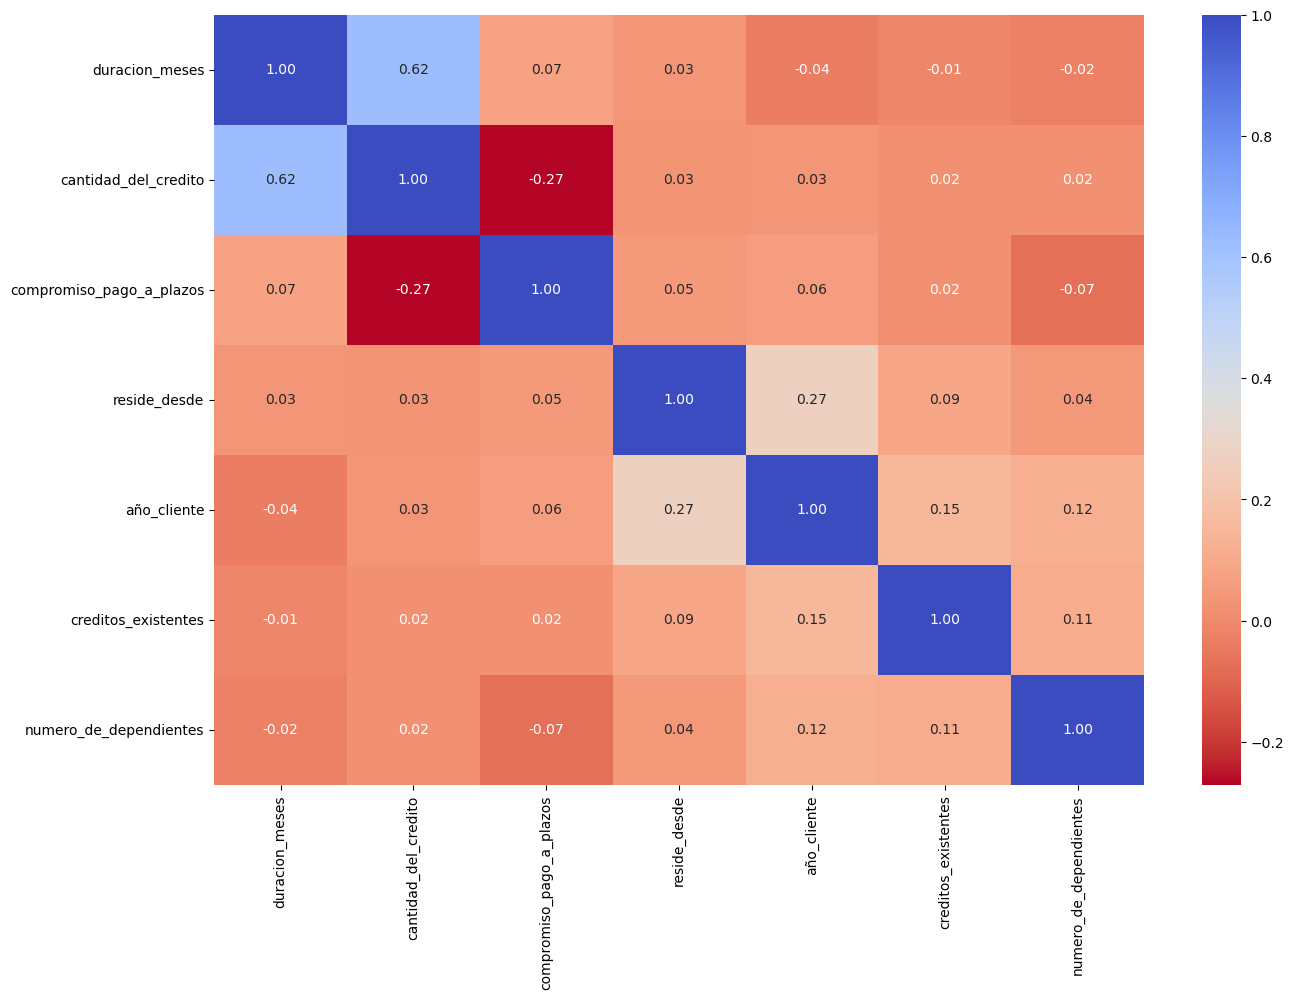

In [11]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt='.2f' , cmap=plt.cm.coolwarm_r)
plt.show()

**Observación**
* Tenemos solamente dos variable que estan altamente correlacionadas con un %62 **Cantidad del credito y duracion del mes**
* Luego podemos ver como se van comportando entre variables hay correlaciones algo positivas y varias negativas. 
----

* # Para que se entienda mucho mejor la correlación que tiene cada variable creamos una funcion para graficar tasas de conversión.
    * # Es decir convertir los clientes que adquirieron el producto y ver si tienen diferencias entre si, para luego ver cual es buena variable y poder usarla en la prediccion que haremos al final.
    ----

In [12]:
#### Pasamos a numeros binarios la columna de "clase"
dic = {"good":1 , "bad":0}
binario = data["clase"].map(dic)
data["good_bin"] = binario

In [13]:
def graficar_tasas_conversion(var_predictora , var_predecir, type="line", order=None):
    x,y = var_predictora ,  var_predecir
    
    #generar agrupaciones,caclulcar tasa, multiplicar el % por 100 
    grupo= data.groupby(x)[y].mean().mul(100).rename("tasa_conv").reset_index()
    
    if type=="line":
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y="tasa_conv", data=grupo)
        plt.grid()
    elif type=="bar":
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y="tasa_conv", data=grupo, order=order)
        plt.grid()
    elif type=="scatter":
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y="tasa_conv" , data=grupo)
        plt.grid()

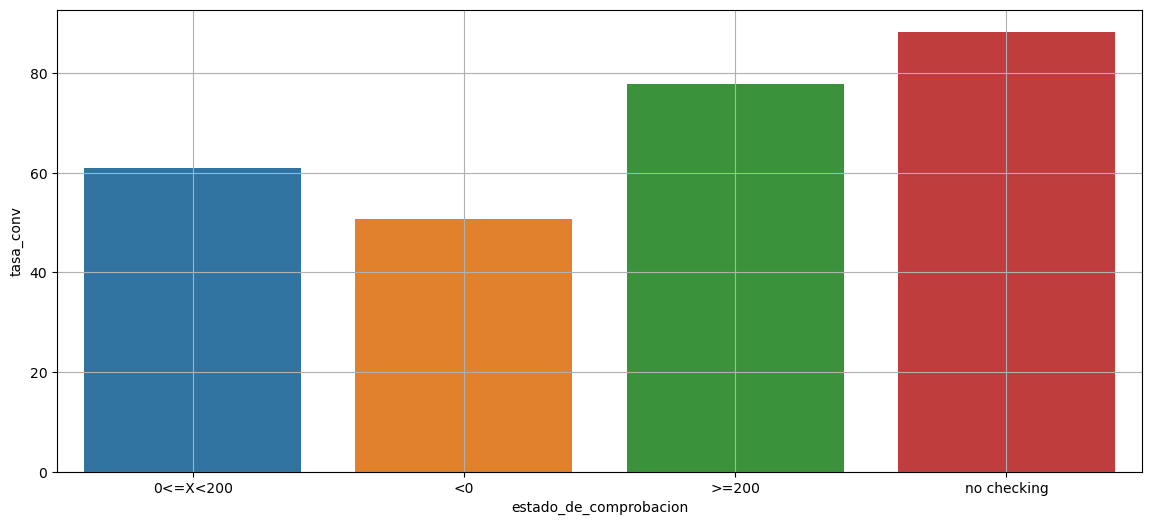

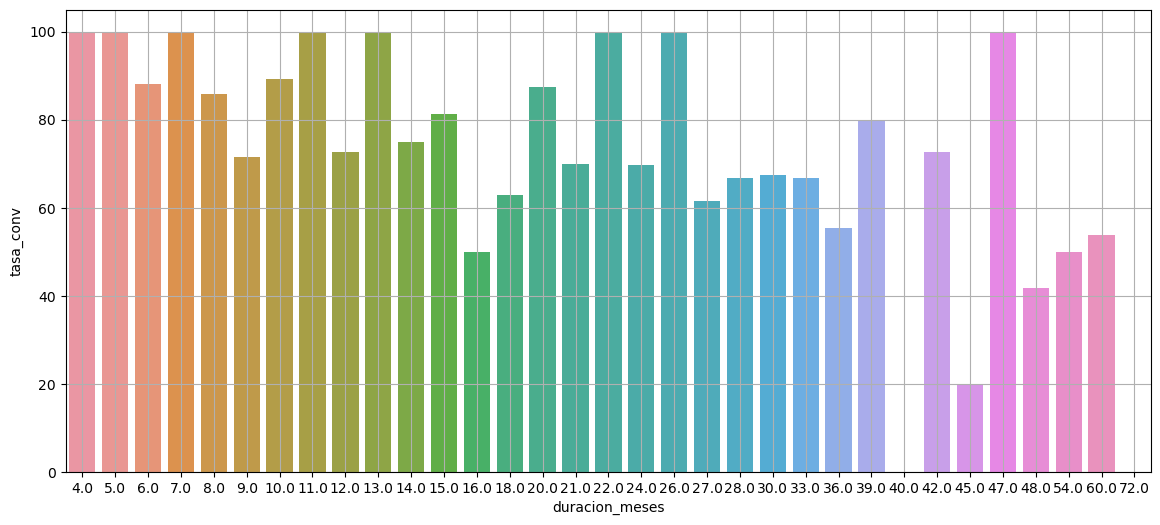

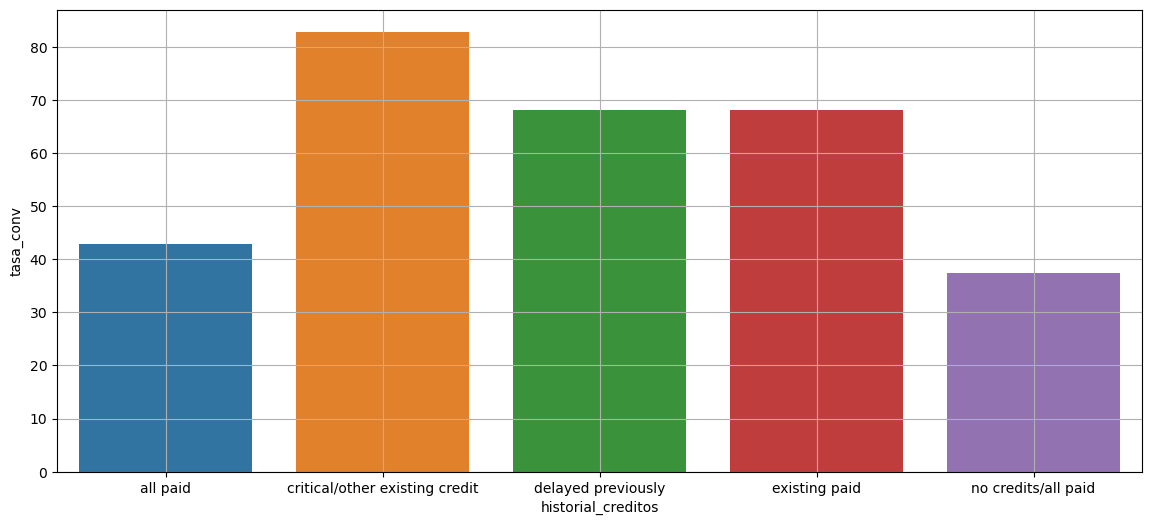

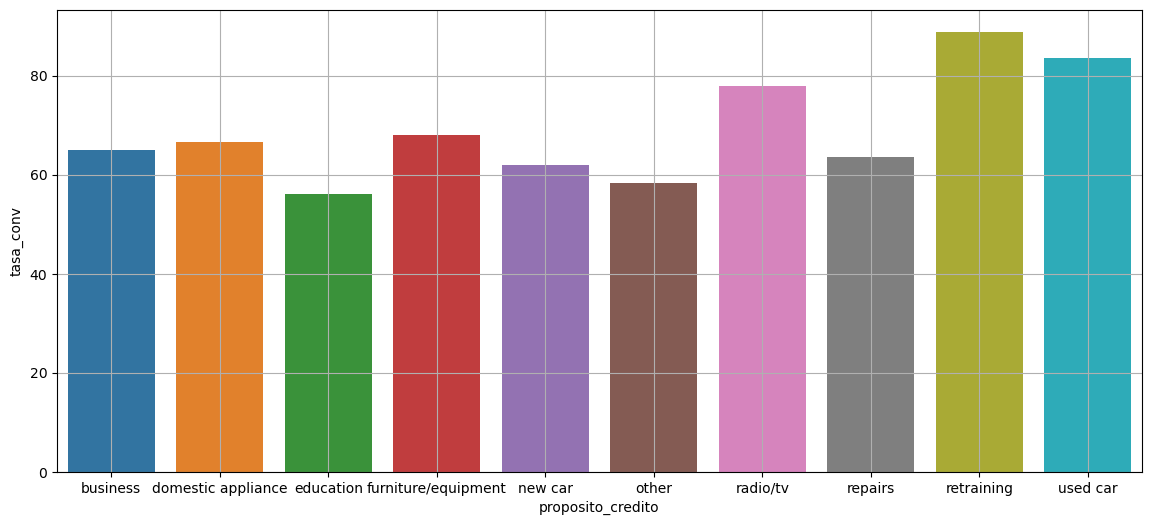

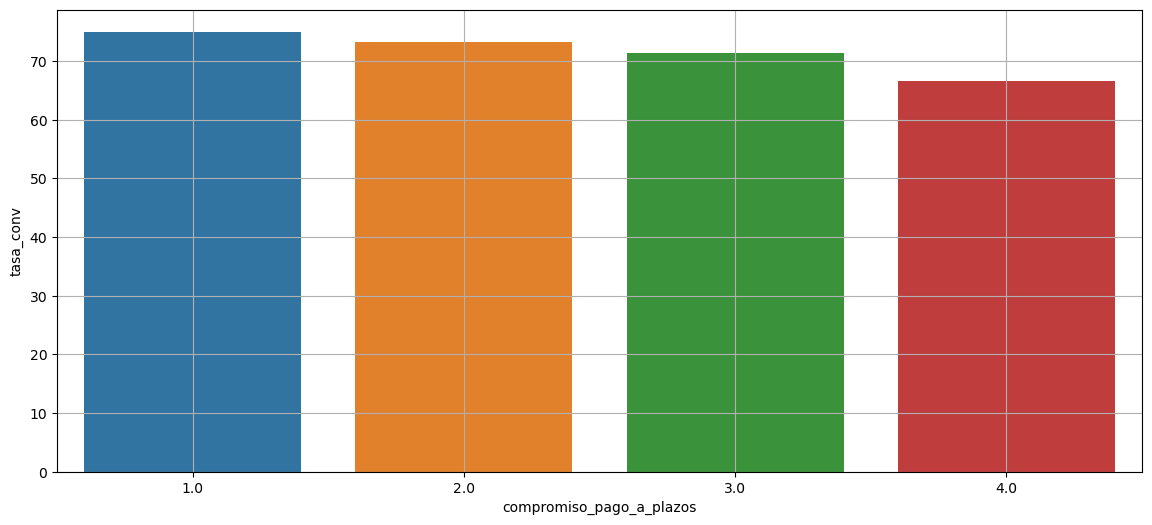

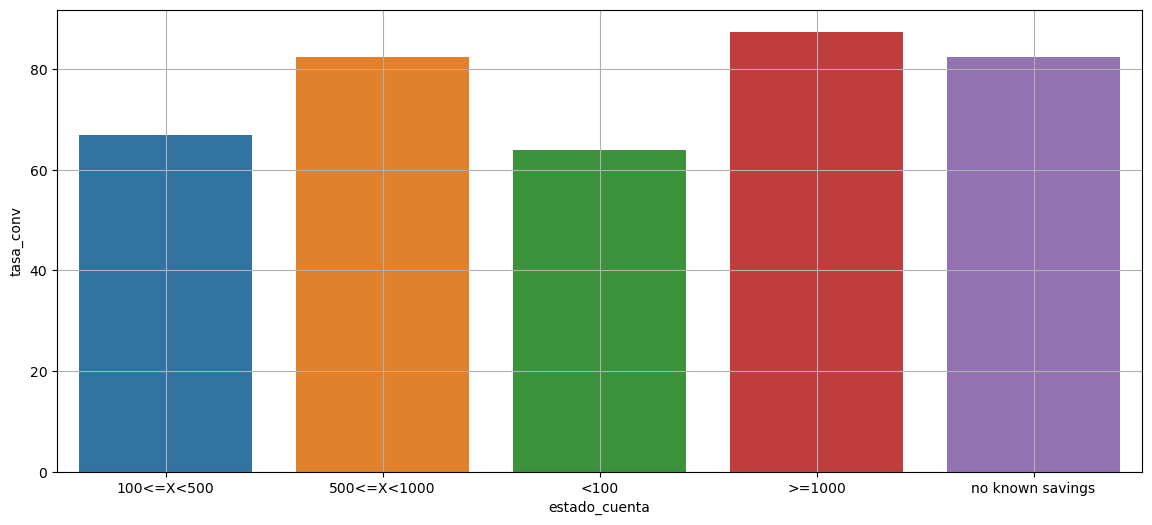

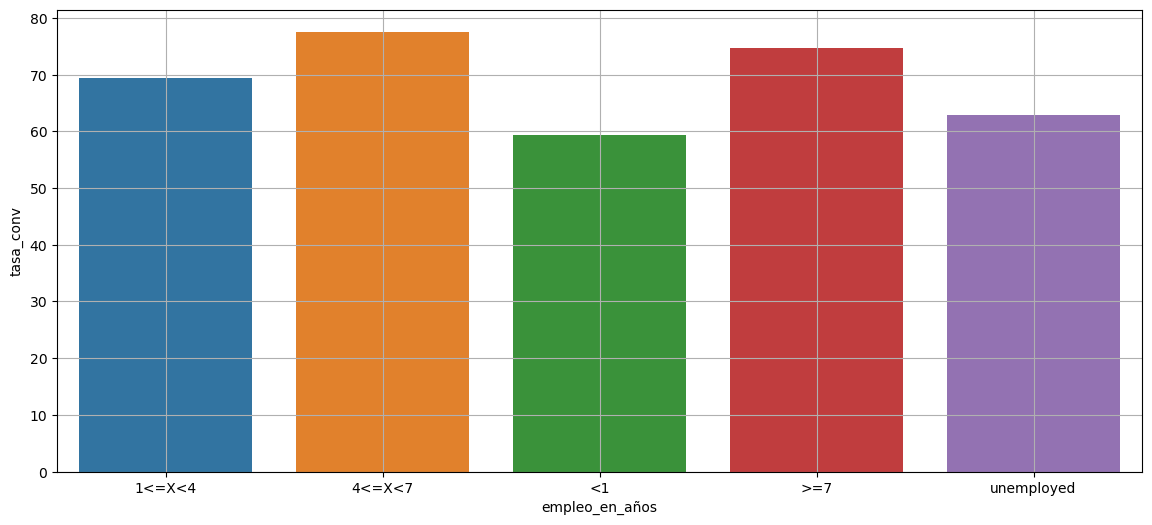

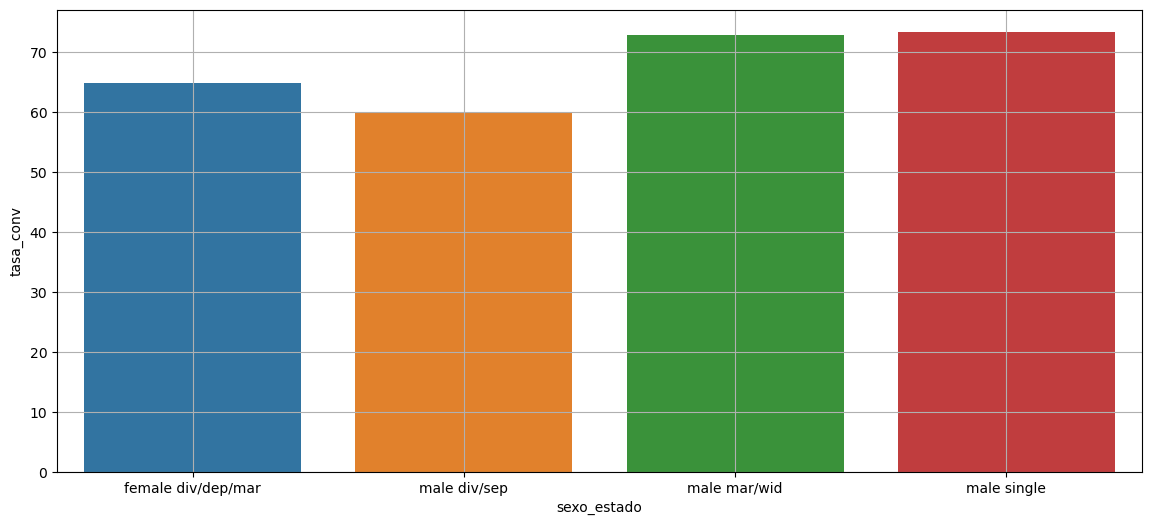

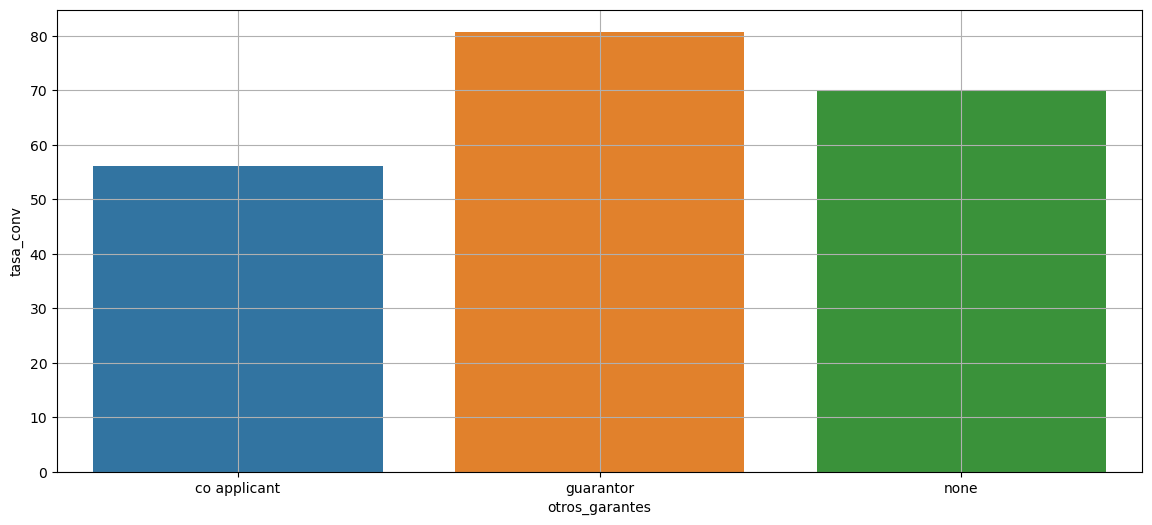

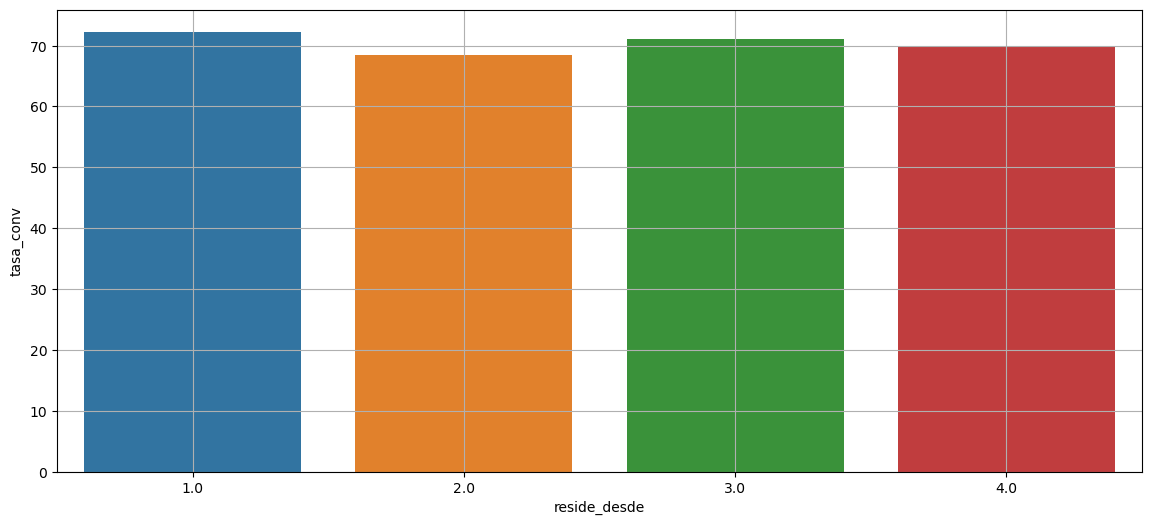

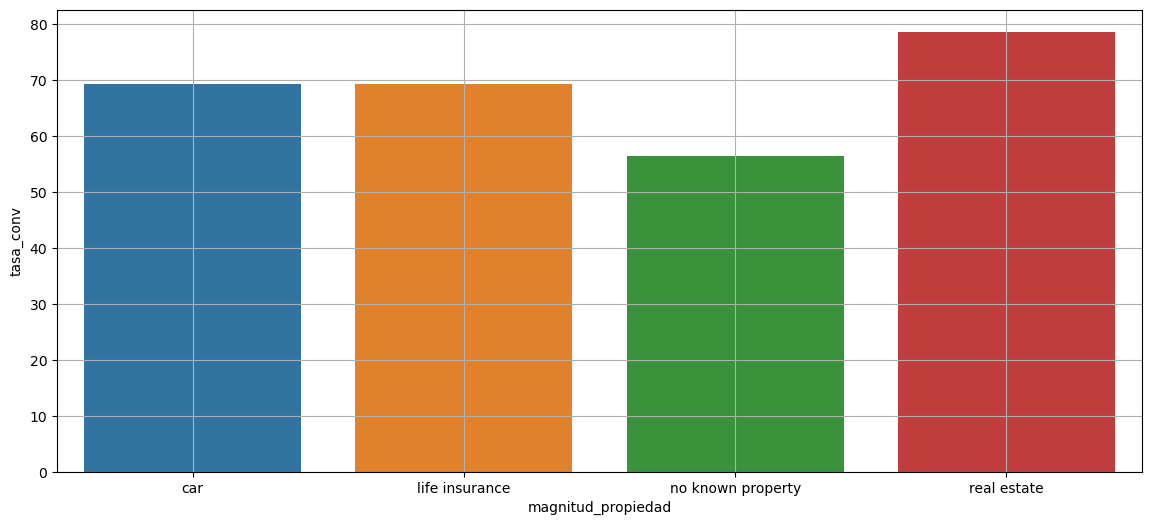

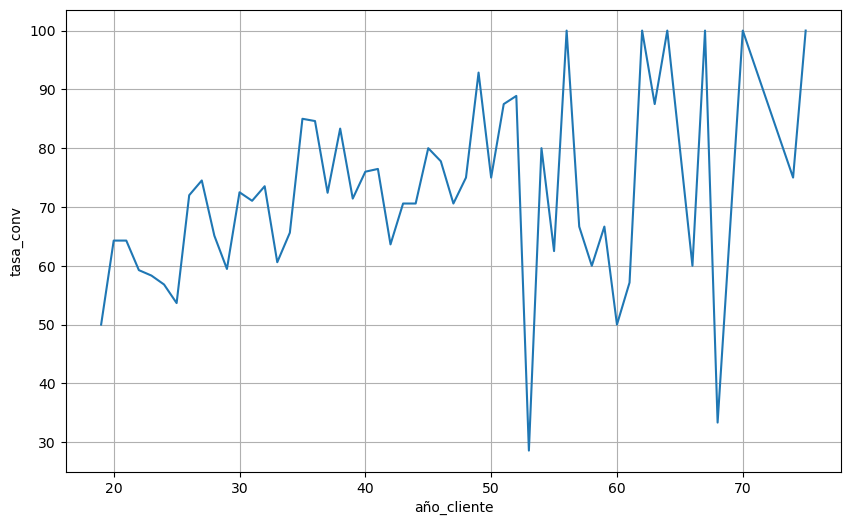

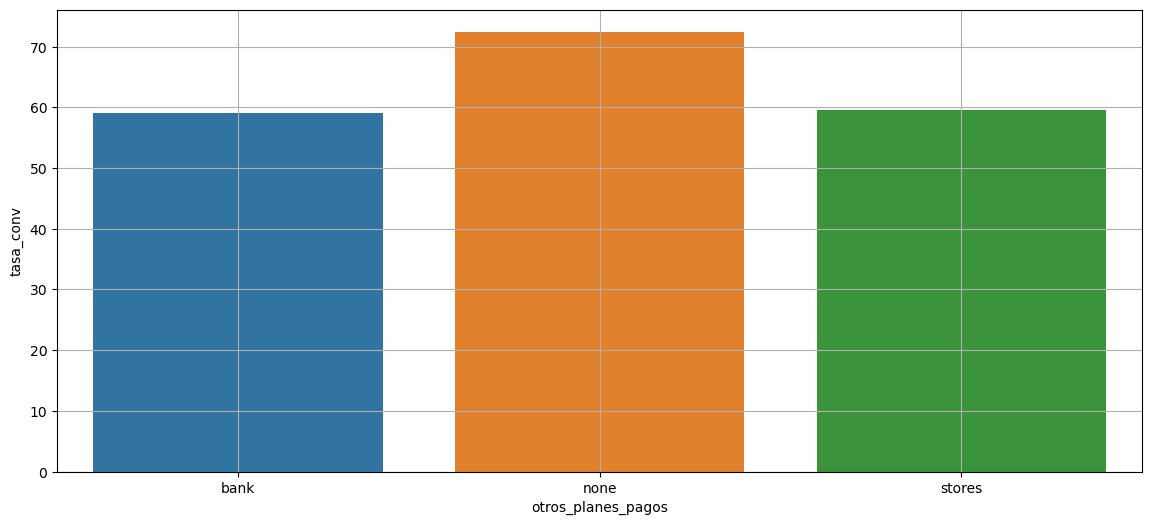

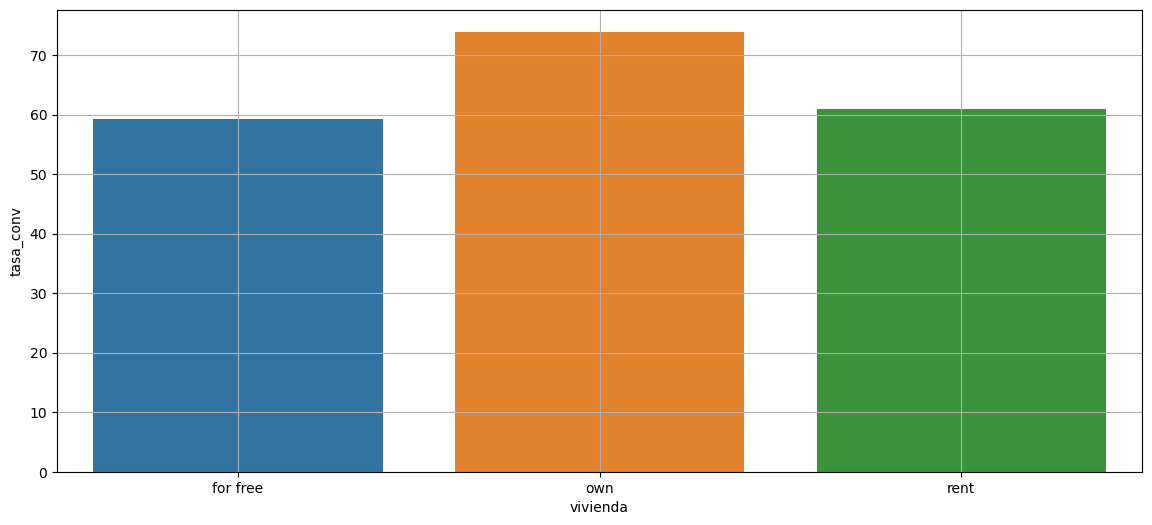

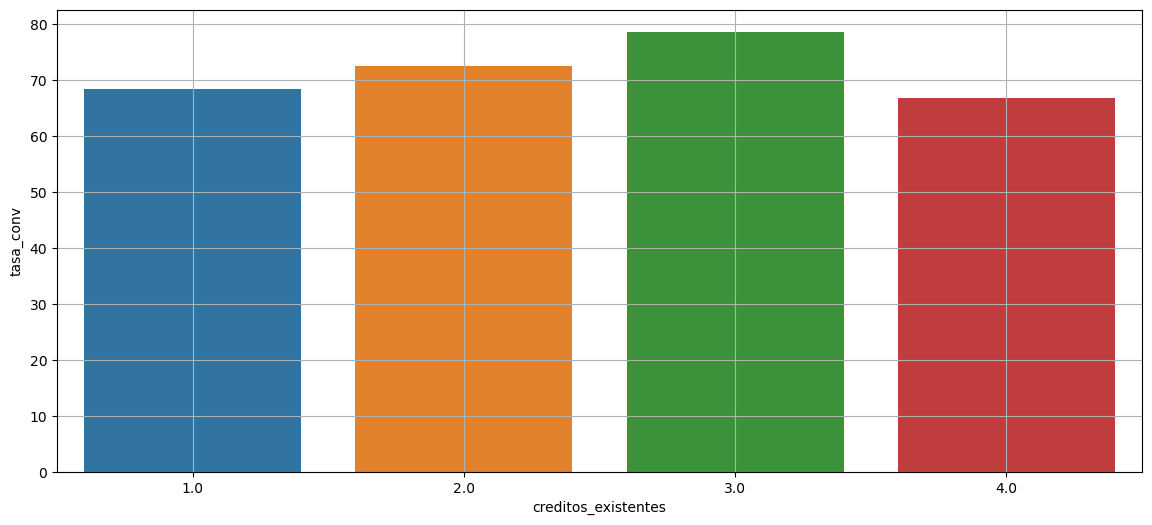

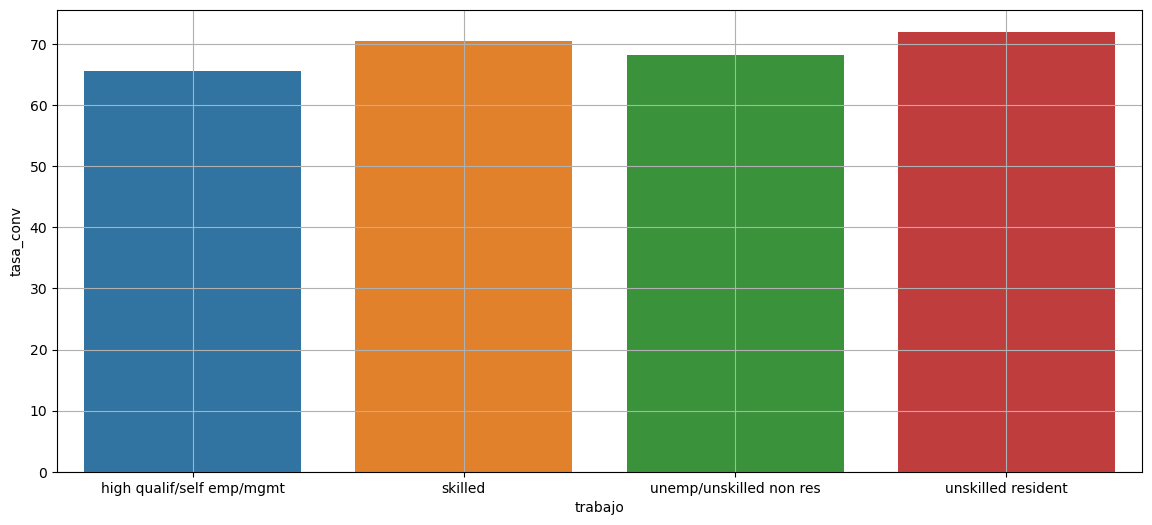

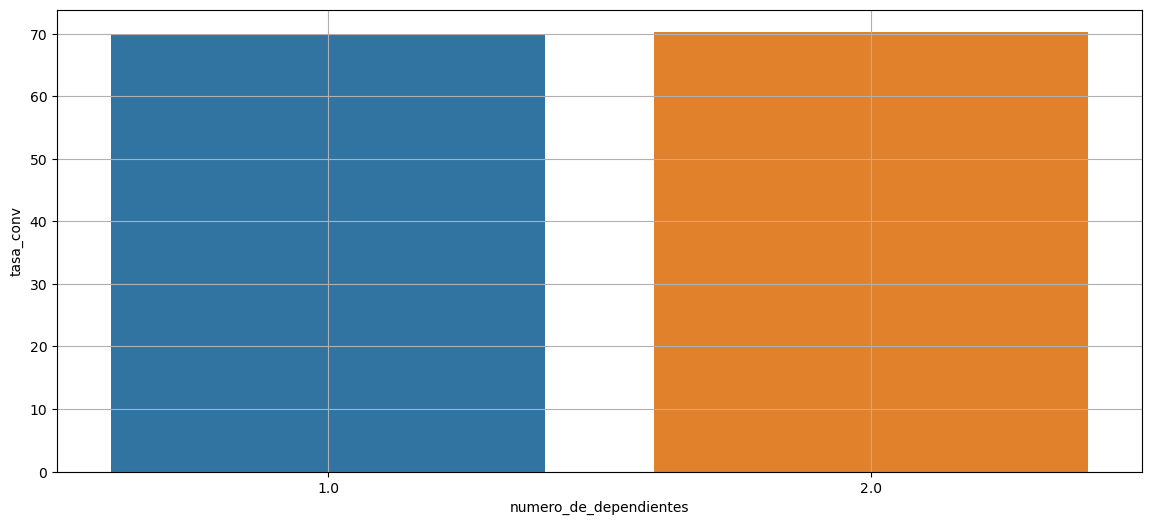

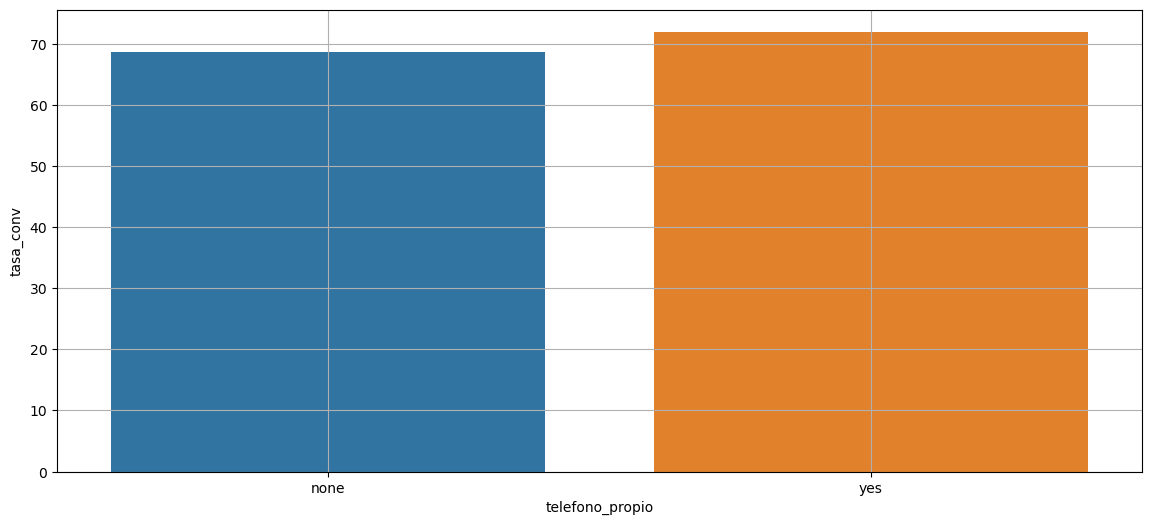

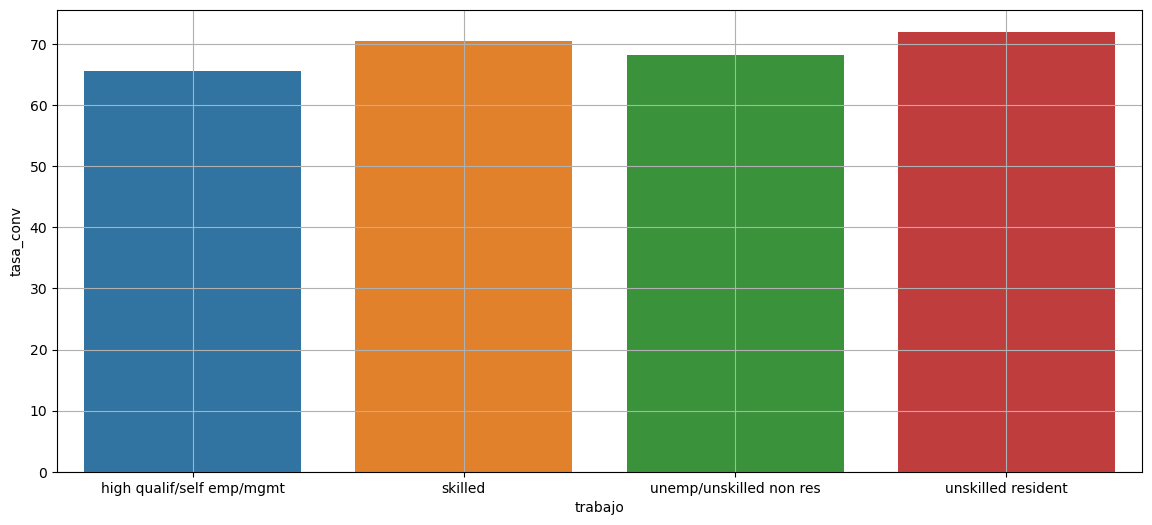

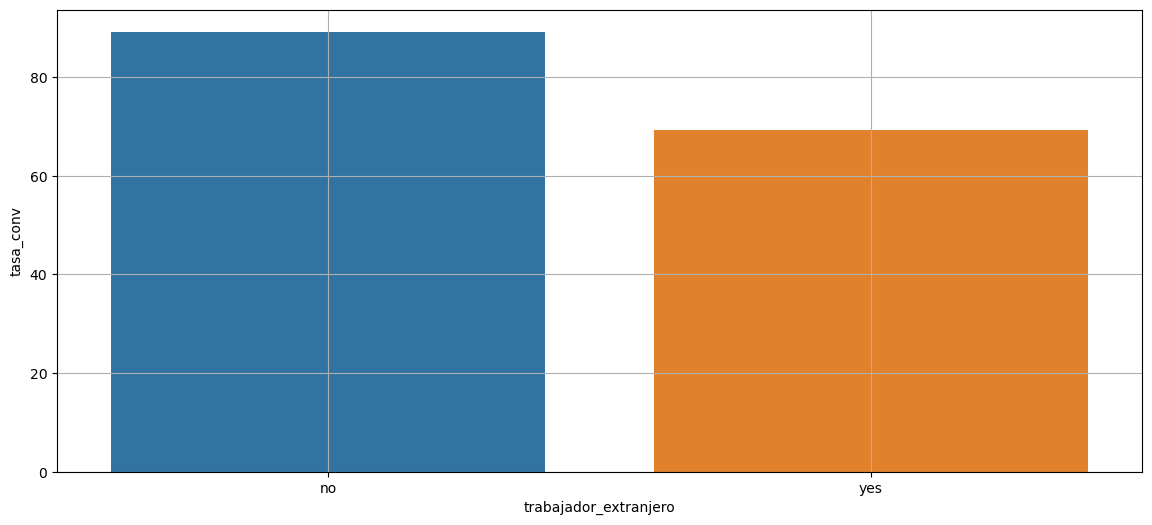

In [14]:
graficar_tasas_conversion("estado_de_comprobacion" , "good_bin" , type="bar")
graficar_tasas_conversion("duracion_meses" , "good_bin" , type="bar")
graficar_tasas_conversion("historial_creditos" , "good_bin" , type="bar")
graficar_tasas_conversion("proposito_credito" , "good_bin" , type="bar")
graficar_tasas_conversion("compromiso_pago_a_plazos" , "good_bin", type="bar")
graficar_tasas_conversion("estado_cuenta" , "good_bin" , type="bar")
graficar_tasas_conversion("empleo_en_años" , "good_bin" , type="bar")
graficar_tasas_conversion("sexo_estado" , "good_bin" , type="bar")
graficar_tasas_conversion("otros_garantes" , "good_bin" , type="bar")
graficar_tasas_conversion("reside_desde" , "good_bin" , type="bar")
graficar_tasas_conversion("magnitud_propiedad" , "good_bin" , type="bar")
graficar_tasas_conversion("año_cliente" , "good_bin")
graficar_tasas_conversion("otros_planes_pagos" , "good_bin" , type="bar")
graficar_tasas_conversion("vivienda" , "good_bin" , type="bar")
graficar_tasas_conversion("creditos_existentes" , "good_bin" , type="bar")
graficar_tasas_conversion("trabajo" , "good_bin" , type="bar")
graficar_tasas_conversion("numero_de_dependientes" , "good_bin" , type="bar")
graficar_tasas_conversion("telefono_propio" , "good_bin" , type="bar")
graficar_tasas_conversion("trabajo" , "good_bin" , type="bar")
graficar_tasas_conversion("trabajador_extranjero" , "good_bin" , type="bar")

* # RESUMEN DE LOS GRAFICOS.
    * ### Podemos observar que no hay variables que tenga algun dato "destacable" por encima de sus pares. Por este mismo caso vamos a tener que hacer varios modelos predictivos para ver como se comportan y elegir el mejor. Si bien con las graficas que creamos se basan sobre todos los clientes que son de clase buena u confiable, vemos que todos los datos siguen una homogeneidad.
----

---
----
* # Clasificación de riesgo crediticio.
    * ### primero crearemos una regresion logistica con los datos numericos, luego con los datos dumificados y por ultimo todos los datos juntos, si es que es conveniente para ver asi cual es mejor modelo creado.

In [17]:
### #### importación de las librerias que vamos a usar
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [18]:
### ### vemos si contiene valores nulos 
print(data.isnull().sum())

estado_de_comprobacion      0
duracion_meses              0
historial_creditos          0
proposito_credito           0
cantidad_del_credito        0
estado_cuenta               0
empleo_en_años              0
compromiso_pago_a_plazos    0
sexo_estado                 0
otros_garantes              0
reside_desde                0
magnitud_propiedad          0
año_cliente                 0
otros_planes_pagos          0
vivienda                    0
creditos_existentes         0
trabajo                     0
numero_de_dependientes      0
telefono_propio             0
trabajador_extranjero       0
clase                       0
good_bin                    0
dtype: int64


In [19]:
#### Separamos 
X = data[["duracion_meses","cantidad_del_credito","compromiso_pago_a_plazos","reside_desde","año_cliente","creditos_existentes","numero_de_dependientes"]]
y = data["clase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred)*100)

Precisión del modelo: 72.0


----------
* # Podemos observar que solamente con las variables numericas y usando un modelo de regresion logistico tenemos un valor en la predicción de unn %72. Es un valor algo bueno para predecir, pero intentaremos con otros tipos de modelos para ver como se comportan, Luego también dumificaremos algunas variables predictoras que estan en valores categoricos, y asi volver a usar este mismo modelo que de prima nos dio un resultado bastante positivo.
---------
-----
* # Creamos una regresión logistica con todas las variables dumificadas.

In [21]:
#### Dumificamos todas las varibales clase. 
clase_dummy = pd.get_dummies(data["clase"] , prefix="clase")
estado_comprobacion_dummy = pd.get_dummies(data["estado_de_comprobacion"], prefix="estado_comprobacion")
historial_cred_dummy = pd.get_dummies(data["historial_creditos"],prefix="historial_creditos")
proposito_cred_dummy = pd.get_dummies(data["proposito_credito"], prefix="proposito_cred")
estado_cuenta_dummy = pd.get_dummies(data["estado_cuenta"], prefix="estado_cuenta")
empleo_años_dummy = pd.get_dummies(data["empleo_en_años"] , prefix="empleo_años")
sexo_estado_dummy = pd.get_dummies(data["sexo_estado"], prefix="sexo_estado")
otros_garantes_dummy = pd.get_dummies(data["otros_garantes"] , prefix="otros_garantes")
otros_planpagado_dummy = pd.get_dummies(data["otros_planes_pagos"], prefix="plan_pagados")
vivienda_dummy = pd.get_dummies(data["vivienda"], prefix="vivienda")
trabajo_dummy = pd.get_dummies(data["trabajo"], prefix="trabajo")
traba_extranjero = pd.get_dummies(data["trabajador_extranjero"],prefix="trabajador_extranjero")

In [22]:
data_dummies = pd.concat([X,estado_comprobacion_dummy,historial_cred_dummy,proposito_cred_dummy,estado_cuenta_dummy,
                          empleo_años_dummy,sexo_estado_dummy,otros_garantes_dummy,otros_planpagado_dummy,vivienda_dummy,
                         trabajo_dummy,traba_extranjero], axis=1)
data_dummies.head()

,duracion_meses,cantidad_del_credito,compromiso_pago_a_plazos,reside_desde,año_cliente,creditos_existentes,numero_de_dependientes,estado_comprobacion_0<=X<200,estado_comprobacion_<0,estado_comprobacion_>=200,...,plan_pagados_stores,vivienda_for free,vivienda_own,vivienda_rent,trabajo_high qualif/self emp/mgmt,trabajo_skilled,trabajo_unemp/unskilled non res,trabajo_unskilled resident,trabajador_extranjero_no,trabajador_extranjero_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [23]:
X1 = data_dummies

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=120)
model.fit(X_train, y_train)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=120)

In [24]:
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred)*100)

Precisión del modelo: 76.66666666666667


* # Vemos que el modelo mejoro un poco mas usando todas las variables numericas y agregandole las variables dumificadas. obtuvimos una precisión de %76,6.
-----
----
* # ÁRBOL DE DECISIÓN (valores dumificados y numericos)

In [25]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [26]:
data_dummies = pd.concat([data_dummies,y], axis=1)
data_dummies.head()

,duracion_meses,cantidad_del_credito,compromiso_pago_a_plazos,reside_desde,año_cliente,creditos_existentes,numero_de_dependientes,estado_comprobacion_0<=X<200,estado_comprobacion_<0,estado_comprobacion_>=200,...,vivienda_for free,vivienda_own,vivienda_rent,trabajo_high qualif/self emp/mgmt,trabajo_skilled,trabajo_unemp/unskilled non res,trabajo_unskilled resident,trabajador_extranjero_no,trabajador_extranjero_yes,clase
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0,1,0,...,0,1,0,0,1,0,0,0,1,good
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1,0,0,...,0,1,0,0,1,0,0,0,1,bad
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,0,1,0,0,0,0,1,0,1,good
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,0,1,0,...,1,0,0,0,1,0,0,0,1,good
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0,1,0,...,1,0,0,0,1,0,0,0,1,bad


In [27]:
colnames = data_dummies.columns.values.tolist()
predictors = colnames[:55]
target = colnames[55]

In [28]:
data_dummies["is_train"] = (np.random.uniform(0,1,len(data))<=0.75).astype(int)
data_dummies.head()

,duracion_meses,cantidad_del_credito,compromiso_pago_a_plazos,reside_desde,año_cliente,creditos_existentes,numero_de_dependientes,estado_comprobacion_0<=X<200,estado_comprobacion_<0,estado_comprobacion_>=200,...,vivienda_own,vivienda_rent,trabajo_high qualif/self emp/mgmt,trabajo_skilled,trabajo_unemp/unskilled non res,trabajo_unskilled resident,trabajador_extranjero_no,trabajador_extranjero_yes,clase,is_train
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0,1,0,...,1,0,0,1,0,0,0,1,good,1
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1,0,0,...,1,0,0,1,0,0,0,1,bad,1
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,1,0,0,0,0,1,0,1,good,0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,0,1,0,...,0,0,0,1,0,0,0,1,good,1
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0,1,0,...,0,0,0,1,0,0,0,1,bad,1


In [29]:
train , test = data_dummies[data_dummies["is_train"]==True], data_dummies[data_dummies["is_train"] == False]

In [30]:
#Creamos el arbol de decision.

tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=50,max_depth=150)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', max_depth=150, min_samples_split=50)

In [31]:
preds = tree.predict(test[predictors])

In [32]:
pd.crosstab(test[target], preds,rownames=["actual"], colnames=["predictions"])

predictions,bad,good
actual,,
bad,39,40
good,30,134


**Observación** 
* en la crosstab que hicimos podemos ver que contiene los datos actuales y predictivos
    * Los clientes que teniamos en **MALOS** 31 acerto y 44 dijo que eran **Buenos**
    * Los clientes que teniamos en **BUENOS** 148 acerto muy bien y 44 dijo que eran **Malos**
----

In [33]:
tree.score(train[predictors], train[target])*100

81.63804491413474

In [34]:
tree.score(test[predictors], test[target])*100

71.19341563786008

* # Tenemos una predición muy buena con el arbol de decisión. Nos arroja un resultado de %81.58 en los datos de entrenamiento y un 67.04 en datos de testeo.
* ## Igualemten intentaremos mejorar el resultado de la predicción usando otros tipos de modelos.
----
---
----
* # Validación cruzada para ver el comportamiento del modelo.

In [36]:
X = data_dummies[predictors]
Y = data_dummies[target]

tree1 = DecisionTreeClassifier(criterion="entropy" , max_depth=15 , min_samples_split=75 , random_state=42)
tree1.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=75,
                       random_state=42)

In [37]:
crossval = KFold(n_splits=8 , shuffle=True , random_state=42)
score = np.mean(cross_val_score(tree1 , X,Y, scoring="accuracy",cv=crossval ,n_jobs=1))
score*100

73.5

In [38]:
# Resultado de cada grupo u árbol.
cross_val_score(tree1,X,Y,scoring="accuracy", cv=crossval,n_jobs=1)

array([0.728, 0.736, 0.752, 0.728, 0.696, 0.792, 0.712, 0.736])

* ## La validación cruzada creada tiene 8 grupos y el resultado promedio sobre su eficacia obtenida en cada uno de sus FOLDS(sus arboles) es de ***%73,5.***
---
------


* # RANDOM FOREST.

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
forest = RandomForestClassifier(n_jobs=2 , oob_score=True ,max_depth=21, n_estimators=355)
forest.fit(X,Y)

RandomForestClassifier(max_depth=21, n_estimators=355, n_jobs=2, oob_score=True)

In [106]:
forest.oob_score_*100

75.7

In [103]:
##### Definimos los hiperparámetros 
max_features = "sqrt"
forest = RandomForestClassifier(n_jobs=2 , oob_score=True ,max_depth=19 ,n_estimators=350, max_features=max_features)
forest.fit(X,Y)

RandomForestClassifier(max_depth=19, n_estimators=350, n_jobs=2, oob_score=True)

In [104]:
forest.oob_score_*100

78.0

* # Obtuvimos una eficacia de %78.0 con el Random Forest.
    * ## Ajustaremos algunos hiperparámetros para ver si el resultado del Randome forest mejora y tambien haremos un randome forest solamente con los datos numericos y vemos si agregando unos que otras variables dummies

----
* # RANDOM FOREST (valores numericos)

In [136]:
#### ### SELECCIONAMOS LOS VALORES NUMERICOS
X = data[["duracion_meses","cantidad_del_credito","compromiso_pago_a_plazos","reside_desde","año_cliente","creditos_existentes","numero_de_dependientes"]]
y = data["good_bin"]

forest = RandomForestClassifier(n_jobs=2 , oob_score=True ,max_depth=15 , n_estimators=355)
forest.fit(X,y)

RandomForestClassifier(max_depth=15, n_estimators=355, n_jobs=2, oob_score=True)

In [118]:
forest.oob_score_*100

71.7

* ## Obtenemos un valor similar, solamente alrededor de %6 por debajo del random forest creado anteriormente
---
---
* # RED NEURONAL(variables numericas)

In [119]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [120]:
#### Dividimos en conjunto de entrenamiento y test
X_train , X_test , y_train, y_test = train_test_split(X,y ,  test_size=0.3 , random_state=42)

In [121]:
### Armamos el modelo
model = Sequential()
model.add(Dense(12,input_dim=X.shape[1],activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [122]:
#### ### Compilamos
model.compile(loss='binary_crossentropy' ,optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [123]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=190, batch_size=32, verbose=1)

Epoch 1/190
22/22 [==============================] - 1s 4ms/step - loss: 1.0247 - accuracy: 0.5086
Epoch 2/190
22/22 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.7014
Epoch 3/190
22/22 [==============================] - 0s 5ms/step - loss: 0.6860 - accuracy: 0.7014
Epoch 4/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.7014
Epoch 5/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.7014
Epoch 6/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.7014
Epoch 7/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.7014
Epoch 8/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.7014
Epoch 9/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.7014
Epoch 10/190
22/22 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.7014
Epoch 11/

22/22 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7014
Epoch 84/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7014
Epoch 85/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7014
Epoch 86/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7014
Epoch 87/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7014
Epoch 88/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7014
Epoch 89/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7014
Epoch 90/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7014
Epoch 91/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7014
Epoch 92/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7014
Epoch 93/190


22/22 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 165/190
22/22 [==============================] - 0s 5ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 166/190
22/22 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 167/190
22/22 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 168/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 169/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 170/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 171/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 172/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7014
Epoch 173/190
22/22 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7014
Epoc

In [125]:
# Evaluar el modelo con conjunto de prueba
score = model.evaluate(X_test, y_test, verbose=1)

print("Precisión del modelo: %.2f%%" % (score[1]*100))

10/10 [==============================] - 0s 3ms/step - loss: 0.6137 - accuracy: 0.6967
Precisión del modelo: 69.67%


* # Obtuvimos un valor del %69.67
----
-----
* # RED NEURONAL(valores dumificados)

In [153]:
X = data_dummies
y = data[["good_bin"]]
X = X.drop(["clase"], axis=1)

In [154]:
#### Dividimos en conjunto de entrenamiento y test
X_train , X_test , y_train, y_test = train_test_split(X,y ,  test_size=0.3 , random_state=42)

In [155]:
### Armamos el modelo
model = Sequential()
model.add(Dense(12,input_dim=X.shape[1],activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [156]:
#### ### Compilamos
model.compile(loss='binary_crossentropy' ,optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [159]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=550, batch_size=32, verbose=1)

Epoch 1/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4673 - accuracy: 0.7771
Epoch 2/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.7843
Epoch 3/550
22/22 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7643
Epoch 4/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.7643
Epoch 5/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.7586
Epoch 6/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4820 - accuracy: 0.7557
Epoch 7/550
22/22 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7657
Epoch 8/550
22/22 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.7343
Epoch 9/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4812 - accuracy: 0.7614
Epoch 10/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.7686
Epoch 11/

22/22 [==============================] - 0s 5ms/step - loss: 0.4690 - accuracy: 0.7600
Epoch 84/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4774 - accuracy: 0.7686
Epoch 85/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.7629
Epoch 86/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4659 - accuracy: 0.7714
Epoch 87/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7686
Epoch 88/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4845 - accuracy: 0.7586
Epoch 89/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4785 - accuracy: 0.7529
Epoch 90/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.7686
Epoch 91/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7471
Epoch 92/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4697 - accuracy: 0.7714
Epoch 93/550


22/22 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.7671
Epoch 165/550
22/22 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7600
Epoch 166/550
22/22 [==============================] - 0s 6ms/step - loss: 0.4574 - accuracy: 0.7829
Epoch 167/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7743
Epoch 168/550
22/22 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.7714
Epoch 169/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7757
Epoch 170/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.7657
Epoch 171/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.7800
Epoch 172/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.7600
Epoch 173/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4994 - accuracy: 0.7329
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.4629 - accuracy: 0.7743
Epoch 246/550
22/22 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.7729
Epoch 247/550
22/22 [==============================] - 0s 7ms/step - loss: 0.4641 - accuracy: 0.7714
Epoch 248/550
22/22 [==============================] - 0s 6ms/step - loss: 0.4680 - accuracy: 0.7729
Epoch 249/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4973 - accuracy: 0.7271
Epoch 250/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.7686
Epoch 251/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 0.7557
Epoch 252/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4816 - accuracy: 0.7471
Epoch 253/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.7471
Epoch 254/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4773 - accuracy: 0.7629
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.4932 - accuracy: 0.7357
Epoch 327/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7943
Epoch 328/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.7700
Epoch 329/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7586
Epoch 330/550
22/22 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.7729
Epoch 331/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7686
Epoch 332/550
22/22 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7571
Epoch 333/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.7614
Epoch 334/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7729
Epoch 335/550
22/22 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.7757
Epoc

22/22 [==============================] - 0s 5ms/step - loss: 0.4964 - accuracy: 0.7443
Epoch 408/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4727 - accuracy: 0.7629
Epoch 409/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.7800
Epoch 410/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.7800
Epoch 411/550
22/22 [==============================] - 0s 5ms/step - loss: 0.4670 - accuracy: 0.7700
Epoch 412/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4580 - accuracy: 0.7900
Epoch 413/550
22/22 [==============================] - 0s 4ms/step - loss: 0.5299 - accuracy: 0.7143
Epoch 414/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4742 - accuracy: 0.7671
Epoch 415/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.7729
Epoch 416/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.7771
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.4542 - accuracy: 0.7814
Epoch 489/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4653 - accuracy: 0.7829
Epoch 490/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.7743
Epoch 491/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4723 - accuracy: 0.7714
Epoch 492/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.7900
Epoch 493/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4620 - accuracy: 0.7700
Epoch 494/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4527 - accuracy: 0.7757
Epoch 495/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.7943
Epoch 496/550
22/22 [==============================] - 0s 3ms/step - loss: 0.4568 - accuracy: 0.7771
Epoch 497/550
22/22 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7700
Epoc

In [160]:
# Evaluar el modelo con conjunto de prueba
score = model.evaluate(X_test, y_test, verbose=1)

print("Precisión del modelo: %.2f%%" % (score[1]*100))

10/10 [==============================] - 0s 5ms/step - loss: 0.5068 - accuracy: 0.7433
Precisión del modelo: 74.33%


* # El resultado obtenido para la red neuronal es de %74.33, es una variable algo buena también se podria decir
-----
-----
* # RESUMEN:  El mejor modelo con la eficacia mas alta fue el de ÁRBOL DE DECISIÓN. con una eficacia del %81 en el modelo de entrenamiento.
    * ## Podremos decir que el modelo creado para saber que clientes pueden adquirir el producto , es del 81% en Gral. 
    * ## Es un muy buen modelo predictorio a pesar de los "pocos" clientes que tenemos, (tengamos en cuenta que es un dataset con 1000 clientes solamente). Podemos saber que tipo de cliente es conveniente contactar para ofrecerle u darle un credito.
    
.---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------.

# RESPUESTAS:

* # la probabilidad de que un cliente sea un buen pagador o no:
    * ## El modelo con mayor eficacia de predecir si un cliente es buen pagador o no es del %81,56
* # clasificar a los clientes en diferentes categorías de riesgo crediticio.
    * ## tenemos dos tipos de categorias. BUENA O MALA (en la prediccion creada tenemos esa misma eficacia 81.56


    
* # ¿Hay alguna variable en el conjunto de datos que sea particularmente importante para la empresa y que deba ser incluida en el modelo predictivo?
    * # Las mejores variables en el conjunto de datos que tenemos son las siguientes : 
    * ### 'creditos_existentes' - 'numero_de_dependientes' - 
    * ### 'historial_creditos_critical/other existing credit' - 'historial_creditos_existing paid'
    * ### 'historial_creditos_no credits/all paid' - 'sexo_estado_female div/dep/mar'
    * ### 'sexo_estado_male mar/wid' - 'sexo_estado_male single'
    * ### 'trabajador_extranjero_no' - 'trabajo_unemp/unskilled non res'
----
* ## Asi sacamos las variables que "son" las mas importantes para dicha empresa

In [180]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [177]:
x = data_dummies[['duracion_meses', 'cantidad_del_credito','compromiso_pago_a_plazos', 'reside_desde', 'año_cliente',
     'creditos_existentes', 'numero_de_dependientes','historial_creditos_critical/other existing credit',
     'historial_creditos_existing paid','historial_creditos_no credits/all paid', 'sexo_estado_female div/dep/mar',
     'sexo_estado_male div/sep', 'sexo_estado_male mar/wid','sexo_estado_male single','trabajo_high qualif/self emp/mgmt',
    'trabajo_skilled','trabajo_unemp/unskilled non res', 'trabajo_unskilled resident','trabajador_extranjero_no',
    'trabajador_extranjero_yes']]
y = np.array(y).ravel()

In [178]:
estimador = SVR(kernel="linear")
selector = RFE(estimador, n_features_to_select=10, step=1)
selector = selector.fit(x,y)
print(selector.ranking_)
print(selector.support_)

[ 8 11  3  9 10  1  1  1  1  1  1  6  1  1  4  7  1  5  1  2]
[False False False False False  True  True  True  True  True  True False
  True  True False False  True False  True False]


In [185]:
x_pred = x[['creditos_existentes','numero_de_dependientes','historial_creditos_critical/other existing credit',
            'historial_creditos_existing paid','historial_creditos_no credits/all paid','sexo_estado_female div/dep/mar',
            'sexo_estado_male mar/wid','sexo_estado_male single','trabajador_extranjero_no','trabajo_unemp/unskilled non res']]